# Projet 3 - Réalisez une étude de santé publique

En 2015, plus de 9 millions de personnes sont mortes de malnutrition dans le monde, dont les 3/4 étaient des enfants. Cela est dû a ce que 10% de la population mondiale est sous-alimentée.
Malgré des initiatives pour enrayer la faim dans le monde, celle-ci à augmenter à 820 millions de personnes en 2018.
Les prévisions fournis par la FAO, la faim devrait atteindre 650 millions en 2030 et 320 millions en 2050.

Environ 27 et 35 % des récoltes sont perdues dans les diverses étapes de récoltes et de transformations. Dans les pays développés, la principale source de gaspillages est lors de la consommation avec 12 % de pertes, dans les pays en voie de de développement, elle est la récolte avec 25 % de pertes.

### Question 1 : Donnez le résultat de votre calcul pour la population mondiale pour l'année 2013, ainsi que pour l'année 2017.

#### Préparation :

Il nous est demandé d'utiliser les fichiers de l'ONU pour l'alimentation et l'agriculture. Le fichier *Bilans Alimentaires* est celui préconisé pour répondre à cette question. 

Une vérification rapide montre qu'entre 2013 et 2014, la méthodologie de comptage a changé, ainsi deux fichiers de sources différentes sont à importer.

Le premier fichier *Bilans Alimentaire (Ancienne méthodologie et population)* pour l'année 2013 est disponible à cette adresse : [Bilans Alimentaire (Ancienne méthodologie et population)](http://www.fao.org/faostat/fr/#data/FBSH) et le deuxième fichier *Nouveaux Bilans Alimentaire* pour l'année 2017 est disponible à cette adresse : [Nouveaux Bilans Alimentaire](http://www.fao.org/faostat/fr/#data/FBS)

Dans ce fichier csv, tous les pays, tous les éléments, tous les produits pour l'année 2013 (Ancienne méthodologie) et l'année 2017 (nouvelle méthodologie) seront importés.

Les fichiers csv du site de l'ONU sera chargé via la bibliothèque *pandas*.

In [1]:
import pandas as pd
import numpy as np
import sqlite3
import OCR3

bilanAlimentaire2013_raw = pd.read_csv('Dataset/BilansAlimentairesHistorique2013.csv', sep=',')
bilanAlimentaire2017_raw = pd.read_csv('Dataset/BilansAlimentairesHistorique2017.csv', sep=',')

Tout d'abord, pour faciliter la manipulation des données et éviter sa dispertion, nous allons *concatener* les deux *data frame* dans un seul.

In [2]:
bilanAlimentaire_raw = pd.concat([bilanAlimentaire2017_raw, bilanAlimentaire2013_raw], ignore_index=True, sort=False)

In [3]:
bilanAlimentaire_raw.head(50)

,Code Domaine,Domaine,Code zone,Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole
0,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,511,Population totale,2501,Population,2017,2017,1000 personnes,36296.11,S,Données standardisées
1,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5301,Disponibilité intérieure,2501,Population,2017,2017,Milliers de tonnes,0.00,S,Données standardisées
2,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5511,Production,2511,Blé,2017,2017,Milliers de tonnes,4281.00,S,Données standardisées
3,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5611,Importations - Quantité,2511,Blé,2017,2017,Milliers de tonnes,2302.00,S,Données standardisées
4,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5072,Variation de stock,2511,Blé,2017,2017,Milliers de tonnes,-119.00,S,Données standardisées
5,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5911,Exportations - Quantité,2511,Blé,2017,2017,Milliers de tonnes,0.00,S,Données standardisées
6,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5301,Disponibilité intérieure,2511,Blé,2017,2017,Milliers de tonnes,6701.00,S,Données standardisées
7,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5521,Aliments pour animaux,2511,Blé,2017,2017,Milliers de tonnes,76.00,S,Données standardisées
8,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5527,Semences,2511,Blé,2017,2017,Milliers de tonnes,344.00,S,Données standardisées
9,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5123,Pertes,2511,Blé,2017,2017,Milliers de tonnes,642.00,S,Données standardisées


Nous allons calculer la population mondiale sur les deux années, 2013 et 2017. Nous allons utiliser une fonction *sommeSerie* qui calculera l'ensemble des valeurs d'une serie.

Pour se faire, nous allons utiliser les lignes dont le Code Élément est 511, ce qui corresponds à la population d'un pays.

In [4]:
codeElementPopulation = 511

Nous allons calculer la population pour l'année 2013.

In [5]:
textPopulation = ('la population mondiale est de','habitants')
OCR3.calculPopulation(bilanAlimentaire_raw, 2013)

8413993000.0

Selon les données que nous avons trouvées sur le site du FAO, la population mondiale devrait etre de 6 997 326 000 habitants.
Nous allons verifier avec l'année 2017

In [6]:
OCR3.calculPopulation(bilanAlimentaire_raw, 2017)

8782494200.0

Pour l'année 2017, également, la valeur est fausse.

Nous constatons que les incohérences sont inhérantes au deux *data set*. Pour se faire, nous allons d'abord visualiser les données pour repérer ces incohérences dans les données.

Tout d'abord, nous importons la bibliothèque *seaborn* pour la présentation des graphiques.

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

sns.set(color_codes = True)

Ensuite nous allons afficher la distribution des populations des pays 50 pays les plus peuplés pour l'année 2017.

Comme nous allons utiliser ce filtre souvent, nous créons un filtre *filtPopulation*.
De même, nous allons afficher, dans les tableaux, les valeurs qui nous interessent. Pour cela, nous allons créer notre listes des colonnes que l'on veut afficher avec *colonneUtile*

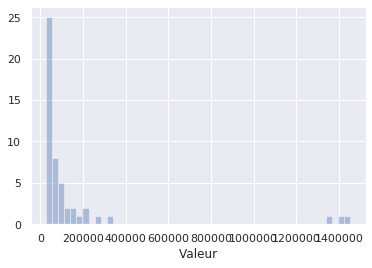

In [8]:
colonneUtile = ['Code zone', 'Année', 'Zone', 'Code Élément', 'Élément', 'Valeur']
filtPopulation2017 = (bilanAlimentaire_raw["Code Élément"] == codeElementPopulation) & (bilanAlimentaire_raw["Année"] == 2017)
sns.distplot(bilanAlimentaire_raw[filtPopulation2017].Valeur.nlargest(50), kde=False, bins=50)

Nous constatons dans ce graphique que trois pays ont une population au-dessus de 1 millard d'habitants. Nous ne connaissons seulement que deux pays : l'Inde et la Chine.

Nous allons afficher ces pays pour trouver le nom du troisième pays

In [9]:
bilanAlimentaire_raw.loc[(filtPopulation2017), colonneUtile].nlargest(5, "Valeur")

,Code zone,Année,Zone,Code Élément,Élément,Valeur
32772,351,2017,Chine,511,Population totale,1452625.24
36355,41,2017,"Chine, continentale",511,Population totale,1421021.79
77250,100,2017,Inde,511,Population totale,1338676.78
56691,231,2017,États-Unis d'Amérique,511,Population totale,325084.76
78363,101,2017,Indonésie,511,Population totale,264650.96


Nous remarquons que les trois premiers pays sont, respectivement, la Chine, la Chine continentale et l'Inde.

Nous allons chercher la différence entre Chine et Chine Continentale en recherchant tous les pays contenant le mot *Chine* dans la colonne *Zone* 

In [10]:
bilanAlimentaire_raw.loc[(bilanAlimentaire_raw['Zone'].str.contains('Chine')) & (filtPopulation2017), colonneUtile]

,Code zone,Année,Zone,Code Élément,Élément,Valeur
32772,351,2017,Chine,511,Population totale,1452625.24
34131,96,2017,Chine - RAS de Hong-Kong,511,Population totale,7306.32
35294,128,2017,Chine - RAS de Macao,511,Population totale,622.59
36355,41,2017,"Chine, continentale",511,Population totale,1421021.79
37530,214,2017,"Chine, Taiwan Province de",511,Population totale,23674.55


Nous voyons qu'il y a, d'un côté la Chine, et de l'autre un ensemble de 4 autres pays contenant le mot 'Chine' dans leur nom de pays.

Nous allons calculer la différence de population entre la Chine et la somme de ces autres pays.

In [11]:
codeZoneChine = 351
codeZoneChineAutre = [96, 128, 41, 214]
OCR3.differencePopulation(bilanAlimentaire_raw, 2017, 'Code Élément', codeElementPopulation, 'Code zone', codeZoneChine, codeZoneChineAutre)

'La différence entre la population de la Chine et des autres pays contenant le mot Chine est de 10.0 habitants'

Nous voyons ici que la population chinoise est comptée deux fois ; la différence entre les deux groupes étant très faible, et négligeable. Ainsi, nous allons vérifier si cette erreur s'applique egalement pour la l'année 2013

In [12]:
filtPopulation2013 = (bilanAlimentaire_raw["Code Élément"] == codeElementPopulation) & (bilanAlimentaire_raw["Année"] == 2013)
bilanAlimentaire_raw.loc[(filtPopulation2013), colonneUtile].nlargest(5, "Valeur")

,Code zone,Année,Zone,Code Élément,Élément,Valeur
205288,351,2013,Chine,511,Population totale,1416667.0
208072,41,2013,"Chine, continentale",511,Population totale,1385567.0
240711,100,2013,Inde,511,Population totale,1252140.0
224458,231,2013,États-Unis d'Amérique,511,Population totale,320051.0
241675,101,2013,Indonésie,511,Population totale,249866.0


Le *Code Element* est le même que pour l'année 2017, soit 511

In [13]:
bilanAlimentaire_raw.loc[(bilanAlimentaire_raw['Zone'].str.contains('Chine')) & (filtPopulation2013), colonneUtile]

,Code zone,Année,Zone,Code Élément,Élément,Valeur
205288,351,2013,Chine,511,Population totale,1416667.0
206407,96,2013,Chine - RAS de Hong-Kong,511,Population totale,7204.0
207310,128,2013,Chine - RAS de Macao,511,Population totale,566.0
208072,41,2013,"Chine, continentale",511,Population totale,1385567.0
209061,214,2013,"Chine, Taiwan Province de",511,Population totale,23330.0


Les *Code Zone* sont les mêmes, et l'anomalie est également présente.
Comme sur l'annee 2017, nous voyons qu'il y a, d'un côté la Chine, et de l'autre un ensemble de 4 autres pays contenant le mot 'Chine' dans leur nom de pays.

Nous allons calculer la différence de population entre la Chine et la somme de ces autres pays.

In [14]:
OCR3.differencePopulation(bilanAlimentaire_raw, 2013, 'Code Élément', codeElementPopulation, 'Code zone', codeZoneChine, codeZoneChineAutre)

"Il n'y a pas de différence"

Ainsi, nous allons enlever les pays en double, c'est-a-dire, les 4 pays autre que la Chine.

In [15]:
bilanAlimentaire = bilanAlimentaire_raw[~bilanAlimentaire_raw['Code zone'].isin(codeZoneChineAutre)]

Nous pouvons calculer les populations pour les années 2017 et 2013

In [16]:
OCR3.calculPopulation(bilanAlimentaire, 2017)

7329868950.0

In [17]:
OCR3.calculPopulation(bilanAlimentaire, 2013)

6997326000.0

#### Conclusion

Nous avons calculer les populations mondiales pour les deux pays. 
* Pour l'année 2013, nous avons 6 997 326 000 Habitants
* Pour l'année 2017, nous avons 7 329 868 950 Habitants

Cela corresponds bien aux données fournis par la FAO

## Partie II

Nous allons traiter les questions 2, 3, 4 et 5 ensemble, puisqu'elles sont liées

### Question 2 : Identifiez ces redondances, en donnant votre réponse sous forme de formule mathématique

Nous avons les équivalences suivantes : 

Disponibilité intérieur = Production + importations – exportations - évolutions du stock = Nourriture + Aliments pour animaux + Semences + Pertes + Traitements + Autres utilisations

Nous allons verifier l'exactitude de ces équivalences avec le blé francais

Nous utiliserons le *Code Produit* pour :
* le blé - 2511

le *Code Zone* pour :
* la France - 68

et les *Code Produit* pour : 
* la *Disponibilité intérieure* - 5301
* la *Production* - 5511
* l' *Importations - Quantité* - 5611
* l' *Exportations - Quantité* - 5911
* la *Variation de stock* - 5072
* la *Nourriture* - 5142
* l' *Aliments pour animaux* - 5521
* la *Semences* - 5527
* la *Pertes* - 5123
* la *Traitement* - 5131
* la *Autres utilisations (non alimentaire)* - 5154

In [18]:
ble = 2511
france = 68
listCodes = (5301, 5511, 5611, 5911, 5072, 5142, 5521, 5527, 5123, 5131, 5154)
dispoInterieur, production, importation, exportation, variation, nourriture, alimentAnimaux, semences, pertes, traitement, autres = OCR3.retourneValeurs(bilanAlimentaire, 2017, {'Code zone': france, 'Code Produit' : ble}, 'Code Élément', listCodes, 'Valeur')

Nous allons calculer les trois valeurs suivantes :
* Disponibilité intérieure
* Production + importations – exportations - évolutions du stock nommée 'Variation'
* Nourriture + Aliments pour animaux + Semences + Pertes + Traitements + Autres utilisations nommée 'Utilisation'

In [19]:
disponibilité_intérieure = dispoInterieur
variation = production + importation - exportation - variation
utilisation = nourriture + alimentAnimaux + semences + pertes + traitement + autres

In [20]:
f"En France, nous pouvons voir que la disponibilité intérieure vaut {disponibilité_intérieure} Milliers de Tonnes de blé. Elle est égale a la variation de {variation} Milliers de Tonnes de blé, et, est aussi égale a l'utilisation de {utilisation} Milliers de Tonnes de blé."

"En France, nous pouvons voir que la disponibilité intérieure vaut 20665.0 Milliers de Tonnes de blé. Elle est égale a la variation de 20665.0 Milliers de Tonnes de blé, et, est aussi égale a l'utilisation de 20664.0 Milliers de Tonnes de blé."

### Question 3 : Calculez (pour chaque pays et chaque produit) la disponibilité alimentaire en kcal puis en kg de protéines.

#### Préparation :

Nous allons créer, *Data Frame* modifié __bilanAlimentaire__, deux nouvelles lignes pour chaque produit et chaque pays contenant la disponibilité alimentaire en kcal/jour et la la disponibilité en proteines en kg/jour. Elles auront les codes 9664 et 9674. Le 9 des milliers etant pour les nouvelles valeurs calculées

Nous allons creer les variables qui serviront a rajouter ces nouvelles lignes

In [21]:
codeElementDispoAlimentaireKCal = 664
codeElementDispoProteineKg = 674

codeDispoAlimentaire = (codeElementDispoAlimentaireKCal, codeElementPopulation)
codeDispoProteine = (codeElementDispoProteineKg, codeElementPopulation)

nouveauElementDispoAlimentaireKCal = 'Disponibilité alimentaire (Kcal/jour)'
nouveauUniteDispoAlimentaireKCal = 'Kcal/jour'
nouveauCodeDispoAlimentaireKCal = 9664

nouveauElementDispoProteineKg = 'Disponibilité alimentaire de protéines en quantité (Kg/jour)'
nouveauUniteDispoProteineKg = 'Kg/jour'
nouveauCodeDispoProteineKg = 9674

multiplicateurDispoAlimentaire = 1000 #Multiplication pour passer de milliers de personnes a personne
multiplicateurDispoProteine = 1000 / 1000 #Division par 1000 pour passer des g en Kg

colonne = ['Zone','Valeur','Année']
avec = ['Zone', 'Année']

#### Calcul, pour chaque pays et chaque produit, la disponibilité alimentaire en kcal

In [22]:
bilanAlimentaire = OCR3.ajoutLigne(bilanAlimentaire, 'Code Élément', codeDispoAlimentaire, nouveauElementDispoAlimentaireKCal, nouveauCodeDispoAlimentaireKCal, nouveauUniteDispoAlimentaireKCal, colonne, multiplicateurDispoAlimentaire, avec)

Nous avons calculé la disponibilité alimentaire pour chaque produit et chaque pays. Nous allons faire un pivot table pour un affichage plus confortable. L'unité est des KCal/jour.

In [23]:
filt = (bilanAlimentaire['Code Élément'] == nouveauCodeDispoAlimentaireKCal) & (bilanAlimentaire['Année'] == 2017)
pd.pivot_table(bilanAlimentaire[filt], index='Zone', columns = 'Produit', values='Valeur', fill_value=0)

Produit,Abats Comestible,"Agrumes, Autres",Aliments pour enfants,Ananas,Animaux Aquatiques Autre,Arachides Decortiquees,Avoine,Bananes,Bananes plantains,"Beurre, Ghee",...,Thé,Tomates,Viande d'Ovins/Caprins,Viande de Anim Aquatiq,Viande de Bovins,Viande de Suides,Viande de Volailles,"Viande, Autre",Vin,"Épices, Autres"
Zone,,,,,,,,,,,,,,,,,,,,,
Afghanistan,181480550.0,36296110,36296110.0,0.000000e+00,0,0.000000e+00,0.000000e+00,2.177767e+08,0.000000e+00,7.985144e+08,...,72592220.0,0.000000e+00,9.436989e+08,0,5.444416e+08,0.000000e+00,1.814806e+08,36296110.0,0.000000e+00,1.451844e+08
Afrique du Sud,969165920.0,0,0.0,5.700976e+07,0,8.551464e+08,3.420586e+08,6.841171e+08,0.000000e+00,3.420586e+08,...,0.0,2.850488e+08,1.026176e+09,0,5.814996e+09,2.451420e+09,8.152396e+09,114019520.0,6.841171e+08,5.700976e+07
Albanie,51915060.0,0,2884170.0,0.000000e+00,0,8.652510e+06,2.884170e+06,4.614672e+07,0.000000e+00,1.038301e+08,...,0.0,1.067143e+08,1.384402e+08,0,1.874711e+08,1.845869e+08,2.451544e+08,2884170.0,5.479923e+07,0.000000e+00
Algérie,165556760.0,0,165556760.0,0.000000e+00,0,8.277838e+07,0.000000e+00,1.241676e+08,0.000000e+00,2.897243e+08,...,0.0,7.450054e+08,1.531400e+09,0,9.519514e+08,0.000000e+00,9.105622e+08,41389190.0,0.000000e+00,1.241676e+08
Allemagne,413292050.0,82658410,0.0,3.306336e+08,0,1.653168e+09,7.439257e+08,1.735827e+09,0.000000e+00,8.927108e+09,...,0.0,9.919009e+08,4.132921e+08,0,3.636970e+09,1.934207e+10,5.868747e+09,495950460.0,3.223678e+09,3.306336e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Émirats arabes unis,75897600.0,0,28461600.0,6.641040e+07,0,2.941032e+08,0.000000e+00,2.656416e+08,4.743600e+07,2.941032e+08,...,9487200.0,6.641040e+07,4.364112e+08,0,3.889752e+08,0.000000e+00,1.394618e+09,123333600.0,0.000000e+00,2.751288e+08
Équateur,117497520.0,16785360,67141440.0,5.035608e+07,0,2.685658e+08,4.028486e+08,3.524926e+08,1.141404e+09,3.357072e+07,...,0.0,5.035608e+07,1.678536e+07,0,1.258902e+09,7.385558e+08,1.393185e+09,0.0,1.678536e+07,3.357072e+07
États-Unis d'Amérique,325084760.0,0,0.0,2.275593e+09,0,1.755458e+10,5.526441e+09,6.501695e+09,6.501695e+08,1.430373e+10,...,0.0,4.876271e+09,9.752543e+08,0,3.315865e+10,4.323627e+10,7.119356e+10,650169520.0,4.876271e+09,1.300339e+09


Nous allons vérifier la véracité de nos calculs, en cherchant la valeur de la disponibilité Alimentaire en Kcal/jour des Abats Comestible pour l'Allemagne.

In [24]:
VerificationProduit = OCR3.retourneValeurs(bilanAlimentaire, 2017, {'Zone': 'Allemagne', 'Produit' : 'Abats Comestible'}, 'Code Élément', [codeElementDispoAlimentaireKCal], 'Valeur')
VerificationPopulation = OCR3.retourneValeurs(bilanAlimentaire, 2017, {'Zone': 'Allemagne', 'Produit' : 'Population'}, 'Code Élément', [codeElementPopulation],'Valeur')
f"La disponibilté alimentaire de l'Allemagne par jour pour les abats comestible est de {VerificationProduit[0] * VerificationPopulation[0] * 1000} KCal/Jour"

"La disponibilté alimentaire de l'Allemagne par jour pour les abats comestible est de 413292050.00000006 KCal/Jour"

Nous constatons que les deux valeurs sont identiques

#### Calcul, pour chaque pays et chaque produit, la disponibilité alimentaire en protéines en kg

In [25]:
bilanAlimentaire = OCR3.ajoutLigne(bilanAlimentaire, 'Code Élément', codeDispoProteine, nouveauElementDispoProteineKg, nouveauCodeDispoProteineKg, nouveauUniteDispoProteineKg, colonne, multiplicateurDispoProteine, avec)

Nous avons calculé la disponibilité en protéine pour chaque produit et chaque pays. Nous allons faire un *pivot table* pour un affichage plus confortable. L'unité est des Kg/jour.

In [26]:
filt = (bilanAlimentaire['Code Élément'] == nouveauCodeDispoProteineKg) & (bilanAlimentaire['Année'] == 2017)
pd.pivot_table(bilanAlimentaire[filt], index='Zone', columns = 'Produit', values='Valeur', fill_value=0)

Produit,Abats Comestible,"Agrumes, Autres",Aliments pour enfants,Ananas,Animaux Aquatiques Autre,Arachides Decortiquees,Avoine,Bananes,Bananes plantains,"Beurre, Ghee",...,Thé,Tomates,Viande d'Ovins/Caprins,Viande de Anim Aquatiq,Viande de Bovins,Viande de Suides,Viande de Volailles,"Viande, Autre",Vin,"Épices, Autres"
Zone,,,,,,,,,,,,,,,,,,,,,
Afghanistan,23229.5104,725.9222,1451.8444,0.0000,0.0000,725.9222,0.0000,2540.7277,0.0000,1088.8833,...,21414.7049,0.0000,58799.6982,0,3.956276e+04,0.000000e+00,1.959990e+04,5081.4554,0.0,6533.2998
Afrique du Sud,154496.4496,0.0000,0.0000,0.0000,0.0000,34775.9536,11401.9520,10831.8544,0.0000,570.0976,...,6271.0736,15392.6352,57009.7600,0,3.785448e+05,6.385093e+04,8.044077e+05,19383.3184,0.0,3420.5856
Albanie,7643.0505,0.0000,115.3668,0.0000,0.0000,461.4672,115.3668,547.9923,0.0000,115.3668,...,28.8417,4960.7724,9863.8614,0,1.788185e+04,6.258649e+03,1.805490e+04,749.8842,0.0,0.0000
Algérie,25247.4059,0.0000,7450.0542,0.0000,0.0000,2897.2433,0.0000,2483.3514,0.0000,413.8919,...,3725.0271,35594.7034,101403.5155,0,8.070892e+04,0.000000e+00,8.153670e+04,6208.3785,0.0,5380.5947
Allemagne,62820.3916,826.5841,0.0000,1653.1682,0.0000,75219.1531,28930.4435,22317.7707,0.0000,11572.1774,...,8265.8410,47941.8778,23144.3548,0,4.413959e+05,1.148125e+06,6.579609e+05,100843.2602,0.0,10745.5933
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Émirats arabes unis,11194.8960,94.8720,1233.3360,379.4880,0.0000,13376.9520,0.0000,3130.7760,474.3600,284.6160,...,1707.6960,3130.7760,30074.4240,0,3.083340e+04,0.000000e+00,1.404106e+05,9297.4560,0.0,8253.8640
Équateur,20813.8464,335.7072,2685.6576,335.7072,167.8536,12924.7272,16785.3600,4699.9008,10910.4840,0.0000,...,167.8536,1846.3896,1342.8288,0,8.107329e+04,5.874876e+04,1.032300e+05,503.5608,0.0,1174.9752
États-Unis d'Amérique,65016.9520,0.0000,0.0000,16254.2380,3250.8476,802959.3572,224308.4844,74769.4948,6501.6952,16254.2380,...,35759.3236,230810.1796,61766.1044,0,4.089566e+06,2.616932e+06,6.478939e+06,130033.9040,0.0,35759.3236


Nous allons vérifier la véracité de nos calculs, en cherchant la valeur de la *disponibilité en protéines* en Kg/jour des Abats Comestible pour l'Allemagne.

In [27]:
VerificationProduit = OCR3.retourneValeurs(bilanAlimentaire, 2017, {'Zone': 'Allemagne', 'Produit' : 'Abats Comestible'}, 'Code Élément', [codeElementDispoProteineKg], 'Valeur')
f"La disponibilté alimentaire de l'Allemagne par jour pour les abats comestible est de {VerificationProduit[0] * VerificationPopulation[0]} Kg/Jour"

"La disponibilté alimentaire de l'Allemagne par jour pour les abats comestible est de 62820.3916 Kg/Jour"

Nous constatons que les deux valeurs sont identiques

### Question 4 : A partir de ces dernières informations, et à partir du poids de la disponibilité alimentaire (pour chaque pays et chaque produit), calculez pour chaque produit le ratio "énergie/poids", que vous donnerez en kcal/kg

#### Préparation :

__Ratio "énergie/poids"__

Ce ration peut être calculé par la formule suivante :
Ratio = Disponibilité Alimentaire * 365 / Nourriture

Nous allons créer, *Data Frame* modifié __bilanAlimentaire__, une nouvelle ligne pour chaque produit et chaque pays contenant le ratio "énergie/poids" en kcal/kg. Elles auront le code 9684. Le 9 des milliers etant pour les nouvelles valeurs calculées

__Ratio "protéine/poids"__

Ce ration peut être calculé par la formule suivante :
Ratio = Disponibilite en proteines * 365 / Nourriture

Nous allons créer, *Data Frame* modifié __bilanAlimentaire__, une nouvelle ligne pour chaque produit et chaque pays contenant le ratio "protéine/poids" sans unité. Elles auront le code 9694. Le 9 des milliers etant pour les nouvelles valeurs calculées


Nous allons creer les variables qui serviront a rajouter cette nouvelle ligne

In [28]:
codeElementDispoAlimentaireKCalTotal = 9664
codeElementDispoProteineKgTotal = 9674
codeElementNourriture = 5142

codeRatioEnergie = (codeElementDispoAlimentaireKCalTotal, codeElementNourriture)
codeRatioProteine = (codeElementDispoProteineKgTotal, codeElementNourriture)

nouveauElementRatioEnergie = 'Ratio "énergie/poids" (Kcal/Kg)'
nouveauUniteRatioEnergie = 'Kcal/Kg'
nouveauCodeRatioEnergie = 9684

nouveauElementRatioProteine = 'Ratio "protéine/poids" (Kg/Kg)'
nouveauUniteRatioProteine = 'Kg/Kg'
nouveauCodeRatioProteine = 9694

multiplicateurRatio = 365 / 1000000

colonne = ['Zone', 'Valeur', 'Produit', 'Année']
avec = ['Zone', 'Année', 'Produit']

#### Calcul du ratio "energie/poids" :

In [29]:
bilanAlimentaire = OCR3.ajoutLigne(bilanAlimentaire, 'Code Élément', codeRatioEnergie, nouveauElementRatioEnergie, nouveauCodeRatioEnergie, nouveauUniteRatioEnergie, colonne, multiplicateurRatio, avec, 'left', 'division')

Nous allons faire un pivot table pour un affichage plus confortable. L'unité est des KCal/Kg.

In [30]:
filt = (bilanAlimentaire['Code Élément'] == nouveauCodeRatioEnergie) & (bilanAlimentaire['Année'] == 2017)
pd.pivot_table(bilanAlimentaire[filt], index='Zone', columns = 'Produit', values='Valeur', fill_value=0)

Produit,Abats Comestible,"Agrumes, Autres",Aliments pour enfants,Ananas,Animaux Aquatiques Autre,Arachides Decortiquees,Avoine,Bananes,Bananes plantains,"Beurre, Ghee",...,Thé,Tomates,Viande d'Ovins/Caprins,Viande de Anim Aquatiq,Viande de Bovins,Viande de Suides,Viande de Volailles,"Viande, Autre",Vin,"Épices, Autres"
Zone,,,,,,,,,,,,,,,,,,,,,
Afghanistan,1249.818882,276.001670,3312.020037,0.000000,0.0,0.000000,0.000000,597.657751,0.000000,7877.236846,...,335.394434,0.000000,2281.126383,0,2091.802129,0.000000,1204.370923,1204.370923,0.000000,3532.821373
Afrique du Sud,1254.416882,0.000000,0.000000,612.016541,0.0,3950.992861,2229.488829,616.549997,0.000000,7344.198494,...,0.000000,189.168749,2283.866605,0,2246.003561,3743.799930,1462.223304,1067.105764,658.846303,2312.062489
Albanie,1114.646876,0.000000,0.000000,0.000000,0.0,3158.166150,0.000000,601.555457,0.000000,7579.598760,...,0.000000,183.729792,1943.486862,0,1629.212696,3208.295771,1903.859027,0.000000,689.714447,0.000000
Algérie,1060.144165,0.000000,3357.123189,0.000000,0.0,7553.527175,0.000000,526.990268,0.000000,11749.931161,...,0.000000,215.473041,2017.909787,0,1809.699219,0.000000,1258.921196,1007.136957,0.000000,3021.410870
Allemagne,1300.444813,1005.677322,0.000000,571.949188,0.0,5387.557080,2688.444325,620.545262,0.000000,7208.837438,...,0.000000,311.569566,2218.405857,0,1077.511416,1693.010743,1331.319264,1028.533624,684.492418,3549.449371
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Émirats arabes unis,1108.104960,0.000000,3462.828000,372.919938,0.0,5649.877263,0.000000,598.513481,824.482857,10734.766800,...,577.138000,302.997450,1991.126100,0,2028.227829,0.000000,1235.523583,1731.414000,0.000000,4016.880480
Équateur,1021.109400,322.455600,3500.946514,282.768757,0.0,3630.611200,2297.496150,606.885775,736.064727,6126.656400,...,0.000000,224.145966,2042.218800,0,2167.449198,1230.926400,1569.482967,0.000000,765.832050,4084.437600
États-Unis d'Amérique,926.999511,0.000000,0.000000,494.694200,0.0,4218.183423,1781.935456,609.429571,655.557665,7201.187925,...,0.000000,170.221792,2144.384411,0,1003.973921,1617.095981,1435.671287,898.908617,684.290296,3541.968281


En cherchant sur internet, la valeur calorifique d'un oeufs est de 1470 KCal/Kg. Nous allons calculer la moyenne que nous avons trouvée. Nous allons remplacer les valeurs nulles de notre pivot table par la valeur de 1470, pour ne pas fausser notre moyenne.

In [31]:
filt = (bilanAlimentaire['Code Élément'] == nouveauCodeRatioEnergie) & (bilanAlimentaire['Produit'] == 'Oeufs')
bilanAlimentaire.loc[filt & (bilanAlimentaire['Valeur'] < 1), 'Valeur'] = 1470
testUnitaire = bilanAlimentaire.loc[filt, 'Valeur']
f"La moyenne du ratio calorifique est de {testUnitaire.mean()} KCal/Kg"

'La moyenne du ratio calorifique est de 1354.2024809402674 KCal/Kg'

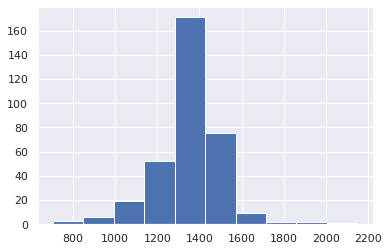

In [32]:
testUnitaire.hist()

In [33]:
testUnitaire.describe()

count     340.000000
mean     1354.202481
std       162.536915
min       704.450000
25%      1286.254093
50%      1391.200548
75%      1431.216690
max      2149.302500
Name: Valeur, dtype: float64

Nous avons un ratio calorifique de 1354 KCal/Kg. Avec un écart-type de 162 et un interquartile de 144.962597, nous constatons que les valeurs sont autour de la valeur mediane, de 1391.2 KCal/Kg

#### Calcul du ratio "poids de protéines/poids total" :

In [34]:
bilanAlimentaire = OCR3.ajoutLigne(bilanAlimentaire, 'Code Élément', codeRatioProteine, nouveauElementRatioProteine, nouveauCodeRatioProteine, nouveauUniteRatioProteine, colonne, multiplicateurRatio, avec, 'left', 'division')

Nous allons faire un pivot table pour un affichage plus confortable. C'est un ratio sans unité.

In [35]:
filt = (bilanAlimentaire['Code Élément'] == nouveauCodeRatioProteine) & (bilanAlimentaire['Année'] == 2017)
pd.pivot_table(bilanAlimentaire[filt], index='Zone', columns = 'Produit', values='Valeur', fill_value=0)

Produit,Abats Comestible,"Agrumes, Autres",Aliments pour enfants,Ananas,Animaux Aquatiques Autre,Arachides Decortiquees,Avoine,Bananes,Bananes plantains,"Beurre, Ghee",...,Thé,Tomates,Viande d'Ovins/Caprins,Viande de Anim Aquatiq,Viande de Bovins,Viande de Suides,Viande de Volailles,"Viande, Autre",Vin,"Épices, Autres"
Zone,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0.159977,0.005520,0.132481,0.000000,0.000000,0.264962,0.000000,0.006973,0.000000,0.010742,...,0.098941,0.000000,0.142132,0,0.152004,0.000000,0.130072,0.168612,0.0,0.158977
Afrique du Sud,0.199969,0.000000,0.000000,0.000000,0.000000,0.160674,0.074316,0.009762,0.000000,0.012240,...,0.099519,0.010215,0.126881,0,0.146210,0.097513,0.144280,0.181408,0.0,0.138724
Albanie,0.164101,0.000000,0.000000,0.000000,0.000000,0.168436,0.000000,0.007143,0.000000,0.008422,...,0.000000,0.008541,0.138473,0,0.155402,0.108781,0.140214,0.000000,0.0,0.000000
Algérie,0.161672,0.000000,0.151071,0.000000,0.000000,0.264373,0.000000,0.010540,0.000000,0.016786,...,0.097117,0.010295,0.133618,0,0.153431,0.000000,0.112731,0.151071,0.0,0.130928
Allemagne,0.197668,0.010057,0.000000,0.002860,0.000000,0.245134,0.104551,0.007978,0.000000,0.009345,...,0.097324,0.015059,0.124231,0,0.130771,0.100495,0.149258,0.209135,0.0,0.115357
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Émirats arabes unis,0.163445,0.008657,0.150056,0.002131,0.000000,0.256978,0.000000,0.007054,0.008245,0.010388,...,0.103885,0.014284,0.137215,0,0.160774,0.000000,0.124393,0.130522,0.0,0.120506
Équateur,0.180882,0.006449,0.140038,0.001885,0.010211,0.174723,0.095729,0.008092,0.007036,0.000000,...,0.061267,0.008219,0.163378,0,0.139584,0.097915,0.116293,0.183800,0.0,0.142955
États-Unis d'Amérique,0.185400,0.000000,0.000000,0.003534,0.084754,0.192943,0.072326,0.007008,0.006556,0.008183,...,0.084754,0.008057,0.135811,0,0.123823,0.097877,0.130653,0.179782,0.0,0.097404


En cherchant sur internet, la valeur protéinique de l'avoine est de 10,70 %. Nous allons calculer la moyenne que nous avons trouvée. Nous allons remplacer les valeurs proche de zéro de notre pivot table par la valeur de 0.1070, pour ne pas fausser notre moyenne.

In [36]:
filt = (bilanAlimentaire['Code Élément'] == nouveauCodeRatioProteine) & (bilanAlimentaire['Produit'] == 'Avoine')
bilanAlimentaire.loc[filt & (bilanAlimentaire['Valeur'] < 0.000001), 'Valeur'] = 0.1070
testUnitaire = bilanAlimentaire.loc[filt, 'Valeur']
f"La moyenne du ratio protéinique est de {testUnitaire.mean()} "

'La moyenne du ratio protéinique est de 0.09915773534398087 '

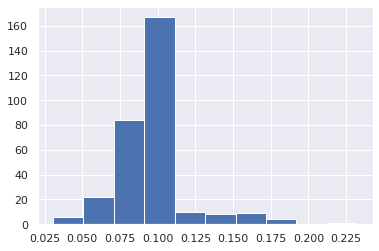

In [37]:
testUnitaire.hist()

In [38]:
testUnitaire.describe()

count    311.000000
mean       0.099158
std        0.024223
min        0.030536
25%        0.085729
50%        0.107000
75%        0.107000
max        0.232384
Name: Valeur, dtype: float64

Nous avons un ratio protéine/poids de 0.099. Avec un écart-type de 0.024 et un interquartile de 0,021271, nous constatons que les valeurs sont légérement dispersées, néanmoins la valeur médiane est de 0.107

### Question 5 : Citez 5 aliments parmi les 20 aliments les plus caloriques, en utilisant le ratio énergie/poids.

Pour faire le calcul, nous enlevons d'abord toutes les lignes ayant une valeur nulle, ensuite, nous groupons les produits ensemble, et enfin nous calculons la valeur médiane

In [39]:
colonneUtile = ['Produit', 'Valeur']
filt = (bilanAlimentaire['Code Élément'] == nouveauCodeRatioEnergie) & (bilanAlimentaire['Valeur'] > 0)
bilanAlimentaire_gb = bilanAlimentaire.loc[filt, colonneUtile].groupby('Produit').median()

In [40]:
bilanAlimentaire[filt].head(30)

,Code Domaine,Domaine,Code zone,Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole
366181,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,9684,"Ratio ""énergie/poids"" (Kcal/Kg)",2511,Blé,2017,2017,Kcal/Kg,3126.452957,Fc,Donnée calculée
366182,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,9684,"Ratio ""énergie/poids"" (Kcal/Kg)",2805,Riz (Eq Blanchi),2017,2017,Kcal/Kg,2494.408396,Fc,Donnée calculée
366183,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,9684,"Ratio ""énergie/poids"" (Kcal/Kg)",2513,Orge,2017,2017,Kcal/Kg,3680.022264,Fc,Donnée calculée
366184,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,9684,"Ratio ""énergie/poids"" (Kcal/Kg)",2514,Maïs,2017,2017,Kcal/Kg,2914.577633,Fc,Donnée calculée
366185,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,9684,"Ratio ""énergie/poids"" (Kcal/Kg)",2517,Millet,2017,2017,Kcal/Kg,2944.017811,Fc,Donnée calculée
366187,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,9684,"Ratio ""énergie/poids"" (Kcal/Kg)",2531,Pommes de Terre,2017,2017,Kcal/Kg,755.372991,Fc,Donnée calculée
366188,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,9684,"Ratio ""énergie/poids"" (Kcal/Kg)",2542,Sucre Eq Brut,2017,2017,Kcal/Kg,3522.148197,Fc,Donnée calculée
366189,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,9684,"Ratio ""énergie/poids"" (Kcal/Kg)",2543,Edulcorants Autres,2017,2017,Kcal/Kg,779.298832,Fc,Donnée calculée
366191,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,9684,"Ratio ""énergie/poids"" (Kcal/Kg)",2549,Légumineuses Autres,2017,2017,Kcal/Kg,3441.059779,Fc,Donnée calculée
366192,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,9684,"Ratio ""énergie/poids"" (Kcal/Kg)",2551,Noix,2017,2017,Kcal/Kg,3312.020037,Fc,Donnée calculée


Nous citons 5 aliments parmi les 20 aliments les plus caloriques, en utilisant le ratio énergie/poids.

In [41]:
bilanAlimentaire_gb.nlargest(20, ['Valeur']).sample(5)

,Valeur
Produit,
Huile de Son de Riz,9086.675000
Huile de Sésame,8906.367974
Huile de Soja,8847.551974
Huile Graines de Coton,8803.120155
"Beurre, Ghee",7244.893388


Nous remarquons qu'en utilisant la moyenne pour calculer les valeurs calorifiques des aliments, nous nous heurtons à des inexactitudes, certaines valeurs ont un ratio trop important. Ce problème est dû à la presence de valeurs extrêmes très grandes ou très faible qui fausse la moyenne. Ainsi, en prenant la valeur médiane, nous savons que l'influence des valeurs extrêmes est presque nulle, ainsi ces valeurs sont plus justes.

In [42]:
colonneUtile = ['Produit', 'Valeur']
filt = (bilanAlimentaire['Code Élément'] == nouveauCodeRatioProteine) & (bilanAlimentaire['Valeur'] > 0)
bilanAlimentaire_gb = bilanAlimentaire.loc[filt, colonneUtile].groupby('Produit').median()

In [43]:
bilanAlimentaire_gb

,Valeur
Produit,
Abats Comestible,0.178313
"Agrumes, Autres",0.004989
Aliments pour enfants,0.150056
Ananas,0.002974
Animaux Aquatiques Autre,0.040118
...,...
Viande de Suides,0.105787
Viande de Volailles,0.124081
"Viande, Autre",0.175244


In [44]:
bilanAlimentaire[filt & (bilanAlimentaire['Produit'] == 'Blé')]

,Code Domaine,Domaine,Code zone,Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole
394379,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,9694,"Ratio ""protéine/poids"" (Kg/Kg)",2511,Blé,2017,2017,Kg/Kg,0.084280,Fc,Donnée calculée
394442,FBS,Nouveaux Bilans Alimentaire,202,Afrique du Sud,9694,"Ratio ""protéine/poids"" (Kg/Kg)",2511,Blé,2017,2017,Kg/Kg,0.093904,Fc,Donnée calculée
394529,FBS,Nouveaux Bilans Alimentaire,3,Albanie,9694,"Ratio ""protéine/poids"" (Kg/Kg)",2511,Blé,2017,2017,Kg/Kg,0.089191,Fc,Donnée calculée
394607,FBS,Nouveaux Bilans Alimentaire,4,Algérie,9694,"Ratio ""protéine/poids"" (Kg/Kg)",2511,Blé,2017,2017,Kg/Kg,0.084686,Fc,Donnée calculée
394691,FBS,Nouveaux Bilans Alimentaire,79,Allemagne,9694,"Ratio ""protéine/poids"" (Kg/Kg)",2511,Blé,2017,2017,Kg/Kg,0.092633,Fc,Donnée calculée
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
419634,FBSH,Bilans Alimentaire (Ancienne méthodologie et p...,236,Venezuela (République bolivarienne du),9694,"Ratio ""protéine/poids"" (Kg/Kg)",2511,Blé,2013,2013,Kg/Kg,0.088783,Fc,Donnée calculée
419711,FBSH,Bilans Alimentaire (Ancienne méthodologie et p...,237,Viet Nam,9694,"Ratio ""protéine/poids"" (Kg/Kg)",2511,Blé,2013,2013,Kg/Kg,0.079658,Fc,Donnée calculée
419770,FBSH,Bilans Alimentaire (Ancienne méthodologie et p...,249,Yémen,9694,"Ratio ""protéine/poids"" (Kg/Kg)",2511,Blé,2013,2013,Kg/Kg,0.087794,Fc,Donnée calculée
419839,FBSH,Bilans Alimentaire (Ancienne méthodologie et p...,251,Zambie,9694,"Ratio ""protéine/poids"" (Kg/Kg)",2511,Blé,2013,2013,Kg/Kg,0.088044,Fc,Donnée calculée


Nous citons 5 aliments parmi les 20 aliments les plus caloriques, en utilisant le ratio protéines/poids.

In [45]:
bilanAlimentaire_gb.nlargest(20, ['Valeur']).sample(5)

,Valeur
Produit,
"Poissons Marins, Autres",0.107319
Aliments pour enfants,0.150056
Graines de tournesol,0.119467
Sésame,0.176944
Piments,0.120313


## Partie III

Nous allons traiter les questions de 6 à 9 ensemble

### Question 6 : Calculez, pour les produits végétaux uniquement, la disponibilité intérieure mondiale exprimée en kcal.

Nous devons créer une liste contenant les produits végétaux uniquement. Pour cela, nous allons afficher tous les produits

In [46]:
bilanAlimentaire['Produit'].unique()

array(['Population', 'Blé', 'Riz (Eq Blanchi)', 'Orge', 'Maïs', 'Seigle',
       'Avoine', 'Millet', 'Sorgho', 'Céréales, Autres',
       'Pommes de Terre', 'Ignames', 'Racines nda', 'Sucre, canne',
       'Sucre, betterave', 'Sucre Eq Brut', 'Edulcorants Autres', 'Miel',
       'Haricots', 'Pois', 'Légumineuses Autres', 'Noix', 'Soja',
       'Arachides Decortiquees', 'Graines de tournesol',
       'Graines Colza/Moutarde', 'Graines de coton', 'Coco (Incl Coprah)',
       'Sésame', 'Olives', 'Plantes Oleiferes, Autre', 'Huile de Soja',
       "Huile d'Arachide", 'Huile de Tournesol',
       'Huile de Colza&Moutarde', 'Huile Graines de Coton',
       'Huile de Palmistes', 'Huile de Palme', 'Huile de Coco',
       'Huile de Sésame', "Huile d'Olive", 'Huile de Son de Riz',
       'Huile de Germe de Maïs', 'Huil Plantes Oleif Autr', 'Tomates',
       'Oignons', 'Légumes, Autres', 'Oranges, Mandarines',
       'Citrons & Limes', 'Pamplemousse', 'Agrumes, Autres', 'Bananes',
       'Pommes'

Et sélectionner que les produits végétaux

In [47]:
vegetaux = ['Blé', 'Riz (Eq Blanchi)', 'Orge', 'Maïs', 'Seigle', 'Avoine', 'Millet', 'Sorgho', 'Céréales, Autres', 
       'Pommes de Terre', 'Ignames', 'Racines nda', 'Sucre, canne',
       'Sucre, betterave',
       'Haricots', 'Pois', 'Légumineuses Autres', 'Noix', 'Soja',
       'Arachides Decortiquees', 'Graines de tournesol',
       'Graines Colza/Moutarde', 'Graines de coton', 'Coco (Incl Coprah)',
       'Sésame', 'Olives', 'Plantes Oleiferes, Autre', 'Tomates',
       'Oignons', 'Légumes, Autres', 'Oranges, Mandarines',
       'Citrons & Limes', 'Pamplemousse', 'Agrumes, Autres', 'Bananes',
       'Pommes', 'Ananas', 'Dattes', 'Raisin', 'Fruits, Autres', 'Café',
       'Feve de Cacao', 'Thé', 'Poivre', 'Piments', 'Girofles',
       'Épices, Autres', 'Manioc',
       'Patates douces', 'Palmistes', 'Bananes plantains',
       'Plantes Aquatiques']

Nous créons une nouvelle colonne pour contenir cette information.

In [48]:
bilanAlimentaire['_calc_Vegetaux'] = 0
bilanAlimentaire.loc[bilanAlimentaire['Produit'].isin(vegetaux),'_calc_Vegetaux'] = 1

Nous créons 2 nouvelles colonnes qui contiennent la disponibilité Intérieur annuelle en KCal et en Kg de protéine pour chaque pays et chaque Produit.

In [49]:
codeElementDisponibilitéIntérieure = 5301

energieDisponibilitéIntérieureKCal = ('Disponibilité intérieure (Kcal)', 9665)
proteineDisponibilitéIntérieureKg = ('Disponibilité intérieure de protéines en quantité (Kg)', 9675)

multiplicateurDisponibilitéIntérieure = 1000000

bilanAlimentaire = OCR3.creatLigneRatio(bilanAlimentaire, codeElementDisponibilitéIntérieure, energieDisponibilitéIntérieureKCal, proteineDisponibilitéIntérieureKg, multiplicateurDisponibilitéIntérieure)

textDisponibiliteInterieureKCal = ('La disponibilité intérieure mondiale, pour les produits végétaux uniquement, est de','KCal')

In [50]:
OCR3.sommeSerie(bilanAlimentaire, 2017, 'Code Élément', 9665, textDisponibiliteInterieureKCal, 1, '_calc_Vegetaux', 1)

'En 2017, La disponibilité intérieure mondiale, pour les produits végétaux uniquement, est de 1.102810821436841e+16 KCal'

In [51]:
OCR3.sommeSerie(bilanAlimentaire, 2013, 'Code Élément', 9665, textDisponibiliteInterieureKCal, 1, '_calc_Vegetaux', 1)

'En 2013, La disponibilité intérieure mondiale, pour les produits végétaux uniquement, est de 1.0057492347665806e+16 KCal'

### Question 7 : Combien d'humains pourraient être nourris si toute la disponibilité intérieure mondiale de produits végétaux était utilisée pour de la nourriture ? Donnez les résultats en termes de calories, puis de protéines, et exprimez ensuite ces 2 résultats en pourcentage de la population mondiale.

Les recommandations de la FAO sont de 2720 KCal par jour et par personne. Avec cette indication, nous allons calculer combien d'humains peuvent etre nourris en termes de calories, et les recommandations de la FAO sont de 56 grammes par jour et par personne. Avec cette indication, nous allons calculer combien d'humains peuvent etre nourris en termes de protéines.

In [52]:
OCR3.calculNourriturePersonne(bilanAlimentaire, 2017, (9665, 9675), veg = 1)

'En 2017, la Disponibilité intérieure (Kcal), permet de nourrir 11108086436.712742 personnes en Kcal soit 151.54549845959718 % de la population mondiale. Et, la Disponibilité intérieure de protéines en quantité (Kg), permet de nourrir 15347025790.304302 personnes en Kg de Protéines soit 209.37653722041375 % de la population mondiale'

In [53]:
OCR3.calculNourriturePersonne(bilanAlimentaire, 2013, (9665, 9675), veg = 1)

'En 2013, la Disponibilité intérieure (Kcal), permet de nourrir 10130431454.135582 personnes en Kcal soit 144.7757536827008 % de la population mondiale. Et, la Disponibilité intérieure de protéines en quantité (Kg), permet de nourrir 14138586829.340693 personnes en Kg de Protéines soit 202.05699762081534 % de la population mondiale'

### Question 8 : Combien d'humains pourraient être nourris si toute la disponibilité alimentaire en produits végétaux (Food) la nourriture végétale destinée aux animaux (Feed) et les pertes de produits végétaux (Waste) étaient utilisés pour de la nourriture ? Donnez les résultats en termes de calories, puis de protéines, et exprimez ensuite ces 2 résultats en pourcentage de la population mondiale.

Nous allons calculer la somme des produits végétaux pour la nourriture (Code = 5142), la nourriture destinée aux animaux (Code = 5521) et les pertes (Code = 5123) 

In [54]:
OCR3.calculNourriture(bilanAlimentaire, 2017)

'En 2017, la Disponibilité Alimentaire (Food/Feed/Waste) (Kcal), permet de nourrir 7297257942.101464 personnes en Kcal soit 99.5550942571963 % de la population mondiale. Et, la Disponibilité Alimentaire de protéines en quantité (Food/Feed/Waste) (Kg), permet de nourrir 9380128676.715706 personnes en Kg de Protéines soit 127.9713012702049 % de la population mondiale'

In [55]:
OCR3.calculNourriture(bilanAlimentaire, 2013)

'En 2013, la Disponibilité Alimentaire (Food/Feed/Waste) (Kcal), permet de nourrir 5744593935.525004 personnes en Kcal soit 82.09698870004061 % de la population mondiale. Et, la Disponibilité Alimentaire de protéines en quantité (Food/Feed/Waste) (Kg), permet de nourrir 7375627645.256925 personnes en Kg de Protéines soit 105.40637445299711 % de la population mondiale'

### Question 9 : Combien d'humains pourraient être nourris avec la disponibilité alimentaire mondiale ? Donnez les résultats en termes de calories, puis de protéines, et exprimez ensuite ces 2 résultats en pourcentage de la population mondiale.

In [56]:
OCR3.calculNourriturePersonne(bilanAlimentaire, 2017, (9664, 9674), veg = 0, jour = 1)

'En 2017, la Disponibilité alimentaire (Kcal/jour), permet de nourrir 7854635256.713235 personnes en Kcal soit 107.15928634321948 % de la population mondiale. Et, la Disponibilité alimentaire de protéines en quantité (Kg/jour), permet de nourrir 10842362661.266071 personnes en Kg de Protéines soit 147.9202798198196 % de la population mondiale'

In [57]:
OCR3.calculNourriturePersonne(bilanAlimentaire, 2013, (9664, 9674), veg = 0, jour = 1)

'En 2013, la Disponibilité alimentaire (Kcal/jour), permet de nourrir 7417845843.75 personnes en Kcal soit 106.00972205311001 % de la population mondiale. Et, la Disponibilité alimentaire de protéines en quantité (Kg/jour), permet de nourrir 10139390631.964285 personnes en Kg de Protéines soit 144.90379084759357 % de la population mondiale'

###  Question 10 : A partir des données téléchargées qui concernent la sous-nutrition, répondez à cette question : Quelle proportion de la population mondiale est considérée comme étant en sous-nutrition ?

Nous allons lire les données venant des fichiers *Données de la sécurité alimentaire* pour les années 2013 et 2017, disponible à cette adresse : [Données de la sécurité alimentaire](http://www.fao.org/faostat/fr/#data/FS)

Nous allons selectionner tous les pays à l'exception de ceux en double (cf. Question 1). De plus nous choisissons uniquement la population en sous-alimentation

In [58]:
securiteAlimentaire_raw = pd.read_csv('Dataset/SecuriteAlimentaires.csv', sep=',')

Nous allons modifier la colonne *Année* pour y mettre soit 2013, soit 2017

In [59]:
securiteAlimentaire_raw.loc[securiteAlimentaire_raw['Année'] == '2012-2014', 'Année'] = 2013
securiteAlimentaire_raw.loc[securiteAlimentaire_raw['Année'] == '2016-2018', 'Année'] = 2017

Ensuite, nous allons mettre les *NaN* à zéro, et les valeurs inferieur à 0.1 à 0.05, pour les Valeurs de population

In [60]:
securiteAlimentaire_raw.loc[securiteAlimentaire_raw['Valeur'].isna(), 'Valeur'] = 0
securiteAlimentaire_raw.loc[securiteAlimentaire_raw['Valeur'] == '<0.1', 'Valeur'] = 0.05

Nous allons rajouter une colonne pour identifier les pays où la population est sous-alimentée, avec un seuil supérieur à 0.1

In [61]:
securiteAlimentaire_raw['Valeur'] = securiteAlimentaire_raw['Valeur'].apply(float)
securiteAlimentaire_raw['_calc_Sous Alimentée'] = 0
securiteAlimentaire_raw.loc[securiteAlimentaire_raw['Valeur'] > 0.1, '_calc_Sous Alimentée'] = 1

Nous calculons le pourcentage de la population sous-alimentée :

In [62]:
populationSousAlimentee2017 = securiteAlimentaire_raw.loc[securiteAlimentaire_raw['Année'] == 2017, 'Valeur'].apply(float).sum() * 1000000 / OCR3.calculPopulation(bilanAlimentaire, 2017)
populationSousAlimentee2013 = securiteAlimentaire_raw.loc[securiteAlimentaire_raw['Année'] == 2013, 'Valeur'].apply(float).sum() * 1000000 / OCR3.calculPopulation(bilanAlimentaire, 2013)

In [63]:
f'En 2017, La population sous alimentée est de {populationSousAlimentee2017 * 100} % de la population mondiale'

'En 2017, La population sous alimentée est de 10.262120716360146 % de la population mondiale'

In [64]:
f'En 2013, La population sous alimentée est de {populationSousAlimentee2013 * 100} % de la population mondiale'

'En 2013, La population sous alimentée est de 10.645495150576092 % de la population mondiale'

### Question 11 : En ne prenant en compte que les céréales destinées à l'alimentation (humaine et animale), quelle proportion (en termes de poids) est destinée à l'alimentation animale ?

Nous devons créer une liste contenant les produits céréaliers uniquement. Pour cela, nous allons afficher tous les produits

In [65]:
bilanAlimentaire['Produit'].unique()

array(['Population', 'Blé', 'Riz (Eq Blanchi)', 'Orge', 'Maïs', 'Seigle',
       'Avoine', 'Millet', 'Sorgho', 'Céréales, Autres',
       'Pommes de Terre', 'Ignames', 'Racines nda', 'Sucre, canne',
       'Sucre, betterave', 'Sucre Eq Brut', 'Edulcorants Autres', 'Miel',
       'Haricots', 'Pois', 'Légumineuses Autres', 'Noix', 'Soja',
       'Arachides Decortiquees', 'Graines de tournesol',
       'Graines Colza/Moutarde', 'Graines de coton', 'Coco (Incl Coprah)',
       'Sésame', 'Olives', 'Plantes Oleiferes, Autre', 'Huile de Soja',
       "Huile d'Arachide", 'Huile de Tournesol',
       'Huile de Colza&Moutarde', 'Huile Graines de Coton',
       'Huile de Palmistes', 'Huile de Palme', 'Huile de Coco',
       'Huile de Sésame', "Huile d'Olive", 'Huile de Son de Riz',
       'Huile de Germe de Maïs', 'Huil Plantes Oleif Autr', 'Tomates',
       'Oignons', 'Légumes, Autres', 'Oranges, Mandarines',
       'Citrons & Limes', 'Pamplemousse', 'Agrumes, Autres', 'Bananes',
       'Pommes'

Et sélectionner que les produits céréaliers

In [66]:
cereales = ['Blé', 'Riz (Eq Blanchi)', 'Orge', 'Maïs', 'Seigle', 'Avoine', 'Millet', 'Sorgho', 'Céréales, Autres']

Nous créons une nouvelle colonne pour contenir cette information.

In [67]:
bilanAlimentaire['_calc_Cereales'] = 0
bilanAlimentaire.loc[bilanAlimentaire['Produit'].isin(cereales),'_calc_Cereales'] = 1

Nous allons calculer les valeurs pour l'alimentation animale (Code = 5521) et humaine (Code = 5142)

In [68]:
ProportionAnimale = OCR3.sommeSerie(bilanAlimentaire, 2017, 'Code Élément', 5521, 0, 1, '_calc_Cereales', 1)
ProportionHumaine = OCR3.sommeSerie(bilanAlimentaire, 2017, 'Code Élément', 5142, 0, 1, '_calc_Cereales', 1)

In [69]:
f"En 2017, la proportion de céréales utilisée pour l'alimentation animale est de {ProportionAnimale / (ProportionAnimale + ProportionHumaine) * 100} % soit {ProportionAnimale} Milliers de Tonnes"

"En 2017, la proportion de céréales utilisée pour l'alimentation animale est de 43.83346329892333 % soit 1005626.0 Milliers de Tonnes"

In [70]:
ProportionAnimale = OCR3.sommeSerie(bilanAlimentaire, 2013, 'Code Élément', 5521, 0, 1, '_calc_Cereales', 1)
ProportionHumaine = OCR3.sommeSerie(bilanAlimentaire, 2013, 'Code Élément', 5142, 0, 1, '_calc_Cereales', 1)

In [71]:
f"En 2013, la proportion de céréales utilisée pour l'alimentation animale est de {ProportionAnimale / (ProportionAnimale + ProportionHumaine) * 100} % soit {ProportionAnimale} Milliers de Tonnes"

"En 2013, la proportion de céréales utilisée pour l'alimentation animale est de 45.91400584899829 % soit 873536.0 Milliers de Tonnes"

Nous constatons qu'une grande partie de la production de céréales est consacrée a l'alimentation animale. 

### Question 12 : Donnez les 3 produits qui ont la plus grande valeur pour chacun des 2 ratios (vous aurez donc 6 produits à citer)

#### Préparation :

Sélectionnez parmi les données des bilans alimentaires les informations relatives aux pays dans lesquels la FAO recense des personnes en sous-nutrition, pour une année choisie.

Repérez les 15 produits les plus exportés par ce groupe de pays sur l'année choisie.

Parmi les données des bilans alimentaires au niveau mondial, sélectionnez les 200 plus grandes importations de ces produits (1 importation = une quantité d'un produit donné importée par un pays donné sur l'année choisie)

Groupez ces importations par produit, afin d'avoir une table contenant 1 ligne pour chacun des 15 produits. Ensuite, calculez pour chaque produit les 2 quantités suivantes :

    le ratio entre la quantité destinés aux "Autres utilisations" (Other uses) et la disponibilité intérieure.
    le ratio entre la quantité destinée à la nourriture animale et la quantité destinée à la nourriture (animale + humaine)


Nous allons trouver, tout d'abord, les 15 produits les exportés par ces pays. Nous allons merger les deux *data frame* pour avoir la colonne des pays où la population est sous-alimentée dans *bilanAlimentaire*

In [72]:
colonne = ('Zone', 'Année', '_calc_Sous Alimentée')
bilanAlimentaire = pd.merge(bilanAlimentaire, securiteAlimentaire_raw.loc[: , colonne], how = 'left', on = ['Zone', 'Année'])

In [73]:
bilanAlimentaire

,Code Domaine,Domaine,Code zone,Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole,_calc_Vegetaux,_calc_Cereales,_calc_Sous Alimentée
0,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,511,Population totale,2501,Population,2017,2017,1000 personnes,36296.11,S,Données standardisées,0,0,1
1,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5301,Disponibilité intérieure,2501,Population,2017,2017,Milliers de tonnes,0.00,S,Données standardisées,0,0,1
2,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5511,Production,2511,Blé,2017,2017,Milliers de tonnes,4281.00,S,Données standardisées,1,1,1
3,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5611,Importations - Quantité,2511,Blé,2017,2017,Milliers de tonnes,2302.00,S,Données standardisées,1,1,1
4,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5072,Variation de stock,2511,Blé,2017,2017,Milliers de tonnes,-119.00,S,Données standardisées,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
481765,FBSH,Bilans Alimentaire (Ancienne méthodologie et p...,181,Zimbabwe,9675,Disponibilité intérieure de protéines en quant...,2765,Crustacés,2013,2013,Kg,0.00,S,Donnée calculée,0,0,1
481766,FBSH,Bilans Alimentaire (Ancienne méthodologie et p...,181,Zimbabwe,9675,Disponibilité intérieure de protéines en quant...,2766,Cephalopodes,2013,2013,Kg,0.00,S,Donnée calculée,0,0,1
481767,FBSH,Bilans Alimentaire (Ancienne méthodologie et p...,181,Zimbabwe,9675,Disponibilité intérieure de protéines en quant...,2767,"Mollusques, Autres",2013,2013,Kg,0.00,S,Donnée calculée,0,0,1
481768,FBSH,Bilans Alimentaire (Ancienne méthodologie et p...,181,Zimbabwe,9675,Disponibilité intérieure de protéines en quant...,2775,Plantes Aquatiques,2013,2013,Kg,0.00,S,Donnée calculée,1,0,1


Ensuite, nous allons, avec un filtre, prendre les exportations des pays où la population est sous-alimentée, les additionner par produits et prendre les 15 plus grandes valeurs.

In [74]:
filt = (bilanAlimentaire['_calc_Sous Alimentée'] == 1) & (bilanAlimentaire['Code Élément'] == 5911)
bilanAlimentaire.loc[filt & (bilanAlimentaire['Année'] == 2017), ['Produit', 'Valeur']].groupby('Produit').sum().nlargest(15, 'Valeur')

,Valeur
Produit,
Maïs,57241.0
Riz (Eq Blanchi),53157.0
Blé,48008.0
Huile de Palme,44183.0
Manioc,40175.0
Sucre Eq Brut,24608.0
"Légumes, Autres",23943.0
Bananes,19109.0
Soja,17564.0


Voici la liste des produits exportés pour l'année 2017

In [75]:
bilanAlimentaire.loc[filt & (bilanAlimentaire['Année'] == 2013), ['Produit', 'Valeur']].groupby('Produit').sum().nlargest(15, 'Valeur')

,Valeur
Produit,
Huile de Palme,46297.0
Maïs,37888.0
Manioc,35923.0
Riz (Eq Blanchi),32798.0
Sucre Eq Brut,25297.0
Blé,24916.0
"Légumes, Autres",19970.0
Bananes,17822.0
"Fruits, Autres",15263.0


Voici la liste des produits exportés pour l'année 2013

Nous mettons ces produits dans la variable *produitExporte2017* et *produitExporte2013*

In [76]:
produitExporte2017 = bilanAlimentaire.loc[filt & (bilanAlimentaire['Année'] == 2017), ['Produit', 'Valeur']].groupby('Produit').sum().nlargest(15, 'Valeur').index
produitExporte2013 = bilanAlimentaire.loc[filt & (bilanAlimentaire['Année'] == 2013), ['Produit', 'Valeur']].groupby('Produit').sum().nlargest(15, 'Valeur').index

Nous allons calculer quels sont les 200 plus gros importateurs de ces produits. Nous créeons un filtre, que l'on appliquera à notre *dataframe*

In [77]:
filt = (bilanAlimentaire['Code Élément'] == 5611) & (bilanAlimentaire['Produit'].isin(produitExporte2017))

In [78]:
bilanAlimentaire.loc[filt & (bilanAlimentaire['Année'] == 2017), ['Zone', 'Produit', 'Valeur']].nlargest(200, 'Valeur').groupby('Produit').sum().sort_values('Valeur', ascending=False)

,Valeur
Produit,
Blé,190801.0
Maïs,141404.0
Soja,135379.0
Lait - Excl Beurre,66928.0
Sucre Eq Brut,41035.0
Manioc,38452.0
Orge,31210.0
"Légumes, Autres",29498.0
Riz (Eq Blanchi),28209.0


Voici la liste la somme des 200 produits les plus importées en 2017

In [79]:
filt = (bilanAlimentaire['Code Élément'] == 5611) & (bilanAlimentaire['Produit'].isin(produitExporte2013))

In [80]:
bilanAlimentaire.loc[filt & (bilanAlimentaire['Année'] == 2013), ['Zone', 'Produit', 'Valeur']].nlargest(200, 'Valeur').groupby('Produit').sum().sort_values('Valeur', ascending=False)

,Valeur
Produit,
Blé,150140.0
Maïs,102489.0
Soja,93497.0
Lait - Excl Beurre,91023.0
Sucre Eq Brut,35071.0
Manioc,34751.0
Huile de Palme,30034.0
"Légumes, Autres",29625.0
"Oranges, Mandarines",22945.0


Voici la liste la somme des 200 produits les plus importées en 2013

Nous allons calculer les ratios entre la quantité destinés aux "Autres utilisations" (Other uses : Code = 5154) et la disponibilité intérieure (Code = 5301)

In [81]:
codeElementAutre = 5154
codeElementDispoInt = 5301
    
colonne = ['Zone', 'Valeur', 'Produit', 'Année']
avec = ['Zone', 'Année', 'Produit']

codeRatio = (codeElementAutre, codeElementDispoInt)
    
nouveauElementRatio = 'Ratio Autres Utilisation / Disponibilité Interieur '
nouveauUniteRatio = '-'
nouveauCodeRatio = 9154

In [82]:
bilanAlimentaire = OCR3.ajoutLigne(bilanAlimentaire, 'Code Élément', codeRatio, nouveauElementRatio, nouveauCodeRatio, nouveauUniteRatio, colonne, 1, avec, 'left', 'division')

In [83]:
filt = (bilanAlimentaire['Code Élément'] == 9154) & (bilanAlimentaire['Produit'].isin(produitExporte2017))
bilanAlimentaire.loc[filt & (bilanAlimentaire['Année'] == 2017), ['Zone', 'Produit', 'Valeur']].groupby('Produit').mean().nlargest(3, 'Valeur')

,Valeur
Produit,
Huile de Palme,0.491384
Manioc,0.287415
Sucre Eq Brut,0.154218


Voici la liste des 3 produits les plus utilisés à d'autre fin qu'alimentaire en 2017. Nous constatons que la moitié de l'Huile de Palme, produit le plus exporté par des pays souffrant de malnutrition en 2013, est utilisé à des fins non-alimentaires.

In [84]:
filt = (bilanAlimentaire['Code Élément'] == 9154) & (bilanAlimentaire['Produit'].isin(produitExporte2013))
bilanAlimentaire.loc[filt & (bilanAlimentaire['Année'] == 2013), ['Zone', 'Produit', 'Valeur']].groupby('Produit').mean().nlargest(3, 'Valeur')

,Valeur
Produit,
Huile de Palme,0.571938
Manioc,0.238643
Sucre Eq Brut,0.144430


Voici la liste des 3 produits les plus utilisés à d'autre fin qu'alimentaire en 2013. Nous constatons que plus de la moitié de l'Huile de Palme, produit le plus exporté par des pays souffrant de malnutrition en 2013, est utilisé à des fins non-alimentaires.

Nous allons calculer les ratios entre la quantité destinée à la nourriture animale(code = 5521) et la quantité destinée à la nourriture (animale + humaine - Code = 5142)

In [85]:
codeElementAnimaux = 5521
codeElementNourriture = 5142
    
colonne = ['Zone', 'Valeur', 'Produit', 'Année']
avec = ['Zone', 'Année', 'Produit']

codeAdd = (codeElementAnimaux, codeElementNourriture)

nouveauElementAdd = 'Nourriture Animaux + Nourriture Humaines'
nouveauUniteAdd = 'Milliers de Tonnes'
nouveauCodeAdd = 9141

nouveauElementRatio = 'Ratio Animaux / Nourriture Total'
nouveauUniteRatio = '-'
nouveauCodeRatio = 9142

codeRatio = (codeElementAnimaux, nouveauCodeAdd)

In [86]:
bilanAlimentaire = OCR3.ajoutLigne(bilanAlimentaire, 'Code Élément', codeAdd, nouveauElementAdd, nouveauCodeAdd, nouveauUniteAdd, colonne, 1, avec, 'left', 'add')

In [87]:
bilanAlimentaire = OCR3.ajoutLigne(bilanAlimentaire, 'Code Élément', codeRatio, nouveauElementRatio, nouveauCodeRatio, nouveauUniteRatio, colonne, 1, avec, 'left', 'division')

In [88]:
filt = (bilanAlimentaire['Code Élément'] == 9142) & (bilanAlimentaire['Produit'].isin(produitExporte2017))
bilanAlimentaire.loc[filt & (bilanAlimentaire['Année'] == 2017), ['Zone', 'Produit', 'Valeur']].groupby('Produit').mean().nlargest(3, 'Valeur')

,Valeur
Produit,
Maïs,0.582678
Orge,0.536719
Soja,0.480653


Nous avons les 3 produits les plus utilisés dans l'alimentation animale. Le Maïs est le produit le plus exporté en 2017 par des pays souffrant de malnutrition.Il est utilisé principalement pour l'élevage.En 2017, l'Orge et le Soja font également partis des produits les plus exportés par ces pays.

In [89]:
filt = (bilanAlimentaire['Code Élément'] == 9142) & (bilanAlimentaire['Produit'].isin(produitExporte2013))
bilanAlimentaire.loc[filt & (bilanAlimentaire['Année'] == 2013), ['Zone', 'Produit', 'Valeur']].groupby('Produit').mean().nlargest(3, 'Valeur')

,Valeur
Produit,
Maïs,0.607727
Soja,0.591048
Blé,0.264171


Nous avons les 3 produits les plus utilisés dans l'alimentation animale. Le Maïs est le produit le plus exporté en 2017 par des pays souffrant de malnutrition.Il est utilisé principalement pour l'élevage.En 2013, le Blé et le Soja font également partis des produits les plus exportés par ces pays.

### Question 13 : Combien de tonnes de céréales pourraient être libérées si les USA diminuaient leur production de produits animaux de 10% ?

Nous allons calculer la production de céréales pour les années 2017 et 2013. Nous multiplions par 1000 pour passer de Milliers de Tonnes en Tonnes et par 0.1 pour avoir 10% de la production.

In [90]:
USA = 231
productionAnimale = 5521
noText = 0
multiplicateur = 0.1 * 1000 

In [91]:
Proportion2017 = OCR3.sommeSerie(bilanAlimentaire[bilanAlimentaire['Code zone'] == USA], 2017, 'Code Élément', productionAnimale, noText, multiplicateur, '_calc_Cereales', 1)

In [92]:
Proportion2013 = OCR3.sommeSerie(bilanAlimentaire[bilanAlimentaire['Code zone'] == USA], 2013, 'Code Élément', productionAnimale, noText, multiplicateur, '_calc_Cereales', 1)

In [93]:
f"{Proportion2017} Tonnes de céréales seraient libérées si les USA diminuaient leur production de produits animaux de 10%"

'14042400.0 Tonnes de céréales seraient libérées si les USA diminuaient leur production de produits animaux de 10%'

In [94]:
f"{Proportion2013} Tonnes de céréales seraient libérées si les USA diminuaient leur production de produits animaux de 10%"

'14009600.0 Tonnes de céréales seraient libérées si les USA diminuaient leur production de produits animaux de 10%'

### Question 14 : En Thaïlande, quelle proportion de manioc est exportée ? Quelle est la proportion de personnes en sous-nutrition?

Nous allons calculer les valeurs de production (Code = 5511) et d'exportation (Code = 5911) de manioc de Thaïlande pour 2017 

In [95]:
manioc = 2532
thailande = 216
listCodes = (5911, 5511)
exportation, production = OCR3.retourneValeurs(bilanAlimentaire, 2017, {'Code zone': thailande, 'Code Produit' : manioc}, 'Code Élément', listCodes, 'Valeur')

In [96]:
f"En 2017, la proportion de manioc exportée depuis la Thailande par rapport à sa production est de {exportation / (exportation + production) * 100} %"

'En 2017, la proportion de manioc exportée depuis la Thailande par rapport à sa production est de 48.704912059885395 %'

Nous allons calculer les valeurs de production (Code = 5511) et d'exportation (Code = 5911) de manioc de Thaïlande pour 2013

In [97]:
exportation, production = OCR3.retourneValeurs(bilanAlimentaire, 2013, {'Code zone': thailande, 'Code Produit' : manioc}, 'Code Élément', listCodes, 'Valeur')

In [98]:
f"En 2013, La proportion de manioc exportée depuis la Thailande par rapport à sa production est de {exportation / (exportation + production) * 100} %"

'En 2013, La proportion de manioc exportée depuis la Thailande par rapport à sa production est de 45.47815735363082 %'

Nous allons calculer les personnes en sous nutrition, et la proportion avec la population en Thailande (code = 210011)

In [99]:
sousNourris = 210011

In [100]:
valeurs = float(OCR3.retourneValeur(securiteAlimentaire_raw, 2017, {'Code zone': thailande, 'Code Produit' : sousNourris}, 'Valeur')[0])
population = OCR3.retourneValeur(bilanAlimentaire, 2017, {'Code zone': thailande, 'Code Élément' : 511}, 'Valeur')[0]

In [101]:
f"La population étant sous alimentée est de {valeurs} millions de personnes soit {valeurs * 1000 * 100 / population} %"

'La population étant sous alimentée est de 5.4 millions de personnes soit 7.802362121785915 %'

In [102]:
valeurs = float(OCR3.retourneValeur(securiteAlimentaire_raw, 2013, {'Code zone': thailande, 'Code Produit' : sousNourris}, 'Valeur')[0])
population = OCR3.retourneValeur(bilanAlimentaire, 2013, {'Code zone': thailande, 'Code Élément' : 511}, 'Valeur')[0]

In [103]:
f"La population étant sous alimentée est de {valeurs} millions de personnes soit {valeurs * 1000 * 100 / population} %"

'La population étant sous alimentée est de 5.6 millions de personnes soit 8.356836937219262 %'

En 2017, presque la moitié du manioc est exportée alors que 7.80 % de la population est sous alimentée

## Partie IV

Nous allons traiter dans cette partie des questions sur les bases de données

### Préparation

Tout d'abord, nous allons lire toutes les fichiers que nous allons utiliser pour peupler notre base de donnée

In [104]:
db_population_raw = pd.read_csv('Dataset/db_Population.csv', sep=',')
db_bilanAlimentaireOld_raw = pd.read_csv('Dataset/db_BilansAlimentairesHistoriqueOld.csv', sep=',')
db_bilanAlimentaireNew_raw = pd.read_csv('Dataset/db_BilansAlimentairesHistoriqueNew.csv', sep=',')
db_equilibreProdOld_raw = pd.read_csv('Dataset/db_EquilibreProdHistoriqueOld.csv', sep=',')
db_equilibreProdNew_raw = pd.read_csv('Dataset/db_EquilibreProdHistoriqueNew.csv', sep=',')
db_securiteAlimentaire_raw = pd.read_csv('Dataset/db_SecuriteAlimentaire.csv', sep=',')

Ensuite, nous allons concatener les deux fichiers bilanAlimentaire, et les deux fichiers equilibreProdNew ensemble

In [105]:
db_bilanAlimentaire_raw = pd.concat([db_bilanAlimentaireOld_raw, db_bilanAlimentaireNew_raw], ignore_index=True, sort=False)
db_equilibreProd_raw = pd.concat([db_equilibreProdOld_raw, db_equilibreProdNew_raw], ignore_index=True, sort=False)

Nous allons enlever les colonnes dont nous nous servirons pas  

In [106]:
db_population = db_population_raw.drop(["Code Domaine", "Domaine", "Code Élément", "Élément", "Code Produit", "Produit", "Code année", "Unité", "Symbole", "Description du Symbole", "Note"], axis=1).fillna(0)
db_bilanAlimentaire = db_bilanAlimentaire_raw.drop(["Code Domaine", "Domaine", "Code année", "Unité", "Symbole", "Description du Symbole"], axis=1).fillna(0)
db_equilibreProd = db_equilibreProd_raw.drop(["Code Domaine", "Domaine", "Code année", "Unité", "Symbole", "Description du Symbole"], axis=1).fillna(0)
db_securiteAlimentaire = db_securiteAlimentaire_raw.drop(["Code Domaine", "Domaine", "Code Élément", "Élément", "Code Produit", "Produit", "Code année", "Unité", "Symbole", "Description du Symbole", "Note"], axis=1).fillna(0)

Nous rajoutons une colonne dans la data frame db_bilanAlimentaire pour différencier l'origine des produits

In [107]:
db_bilanAlimentaire['origin'] = 'animal'
db_bilanAlimentaire.loc[db_bilanAlimentaire['Produit'].isin(vegetaux),'origin'] = 'végétal'

Nous allons préparer les data frames en mettant en forme selon les tables de la base de donnée.

In [108]:
code = {645 : 'dispo_alim_tonnes', 664 : 'dispo_alim_kcal_p_j', 674 : 'dispo_prot', 684 : 'dispo_mat_gr'}
db_bilanAlimentaire = OCR3.ligneToColonne(db_bilanAlimentaire, code)

In [109]:
code = {5301 : 'dispo_int', 664 : 'alim_ani', 5527 : 'semences', 5123 : 'pertes', 5131 : 'transfo', 5142 : 'nourriture', 5154 : 'autres_utilisations'}
db_equilibreProd = OCR3.ligneToColonne(db_equilibreProd, code)

Nous mettons les valeurs notées sous forme de chaine de caractères en float, puis nous multiplions par 1 million pour avoir la valeur en millier d'habitants

In [110]:
db_securiteAlimentaire.loc[db_securiteAlimentaire['Valeur'] == '<0.1', 'Valeur'] = 0
db_securiteAlimentaire['Valeur'] = db_securiteAlimentaire['Valeur'].astype(float) * 1000

Nous renommons les colonnes selon la nomenclature de la base de données, pour les data frames db_bilanAlimentaire et db_equilibreProd, la fonction ligneToColonne a déjà réaliser le renommage des colonnes

In [111]:
db_population.rename(columns={'Code zone': 'code_pays', 'Zone': 'pays', 'Année': 'annee', 'Valeur': 'population'}, inplace=True)
db_securiteAlimentaire.rename(columns={'Code zone': 'code_pays', 'Zone': 'pays', 'Année': 'annee', 'Valeur': 'nb_personnes'}, inplace=True)

Nous remplaçons également les années, qui sont une chaîne de caractère, en nombre entier.

In [112]:
db_securiteAlimentaire['annee'] = db_securiteAlimentaire['annee'].str[0:4].astype(int) + 1

### Question 15 : Proposez une clé primaire pertinente pour cette table.

Pour la table Population, nous pouvons choisir soit une clé primaire auto-incrementée. Mais, également, il est possible de prendre une nouvelle colonne composée des nombres de code_pays et d'année. Cela peut permettre de faire des jointure plus facilement avec la table sous-nutrition.

### Question 16 : Proposez une clé primaire pertinente pour cette table.

Pour la table Dispo_alim, nous pouvons choisir soit une clé primaire auto-incrementée. Mais, également, il est possible de prendre une nouvelle colonne composée des nombres de code_pays, code_produit et d'année.

### Question 17 : Proposez une clé primaire pertinente pour cette table.

Pour la table Equilibre_prod, nous pouvons choisir soit une clé primaire auto-incrementée. Mais, également, il est possible de prendre une nouvelle colonne composée des nombres de code_pays, code_produit et d'année. 

### Question 18 : Vous vous en doutez... proposez encore une fois une clé primaire pertinente pour cette table !

Pour la table Sous-nutrition, nous pouvons choisir soit une clé primaire auto-incrementée. Mais, également, il est possible de prendre une nouvelle colonne composée des nombres de code_pays et d'année. Cela peut permettre de faire des jointure plus facilement avec la table Population.

#### Ouverture de la base de donnée

Après avoir déterminer les clés utilisées, nous allons ouvrir un connecteur vers la base de donnée *fao* et un curseur pour effectuer les requêtes.

In [113]:
conn = sqlite3.connect("fao.db")
cur = conn.cursor()

Nous allons créer les 4 tables demandées, à savoir population, dispo_alim, equibre_prod et sous_nutrition

In [114]:
cur.execute("CREATE TABLE population (pays TEXT, code_pays INTEGER NOT NULL, annee INTEGER NOT NULL, population REAL, PRIMARY KEY (code_pays, annee))")
cur.execute("CREATE TABLE dispo_alim (pays TEXT, code_pays INTEGER NOT NULL, annee INTEGER NOT NULL, produit TEXT, code_produit INTEGER NOT NULL, origin TEXT, dispo_alim_tonnes REAL, dispo_alim_kcal_p_j REAL, dispo_prot REAL, dispo_mat_gr REAL, PRIMARY KEY (code_pays, annee, code_produit))")
cur.execute("CREATE TABLE equilibre_prod (pays TEXT, code_pays INTEGER NOT NULL, annee INTEGER NOT NULL, produit TEXT, code_produit INTEGER NOT NULL, dispo_int REAL, alim_ani REAL, semences REAL, pertes REAL, transfo REAL, nourriture REAL, autres_utilisations REAL, PRIMARY KEY (code_pays, annee, code_produit))")
cur.execute("CREATE TABLE sous_nutrition (pays TEXT, code_pays INTEGER NOT NULL, annee INTEGER NOT NULL, nb_personnes REAL, PRIMARY KEY (code_pays, annee))")
conn.commit()

Nous enlevons tous les lignes en double pour éviter d'avoir des doublons avec la même clés.

In [115]:
db_population.drop_duplicates(inplace=True)
db_securiteAlimentaire.drop_duplicates(inplace=True)

Nous insérons les données des data frames dans la base de données 

In [116]:
db_population.to_sql("population", conn, if_exists='append', index=False)
db_bilanAlimentaire.to_sql("dispo_alim", conn, if_exists='append', index=False)
db_equilibreProd.to_sql("equilibre_prod", conn, if_exists='append', index=False)
db_securiteAlimentaire.to_sql("sous_nutrition", conn, if_exists='append', index=False)

### Question 19 : Écrivez les requêtes SQL permettant de connaître…

* Les 10 pays ayant le plus haut ratio disponibilité alimentaire/habitant en termes de protéines (en kg) par habitant, puis en termes de kcal par habitant.


In [117]:
pd.read_sql_query("SELECT pays, AVG(total_dispo_prot) AS total_dispo FROM (SELECT pays, annee, SUM(dispo_prot) AS total_dispo_prot FROM dispo_alim GROUP BY pays, annee) GROUP BY pays ORDER BY total_dispo DESC LIMIT 10", conn)

,pays,total_dispo
0,Islande,137.198333
1,Lituanie,124.871667
2,Israël,124.190000
3,Finlande,117.261667
4,Albanie,114.086667
5,Malte,112.613333
6,Portugal,111.876667
7,États-Unis d'Amérique,111.420000
8,France,111.341667
9,Norvège,110.543333


In [118]:
pd.read_sql_query("SELECT pays, AVG(dispo_alim_kcal_p_j) AS total_dispo FROM (SELECT pays, annee, sum(dispo_alim_kcal_p_j) AS dispo_alim_kcal_p_j FROM dispo_alim GROUP BY pays, annee) GROUP BY pays ORDER BY total_dispo DESC LIMIT 10", conn)

,pays,total_dispo
0,Belgique,3761.833333
1,Autriche,3720.666667
2,États-Unis d'Amérique,3718.833333
3,Irlande,3682.000000
4,Turquie,3593.333333
5,Allemagne,3538.000000
6,Italie,3532.333333
7,Israël,3528.166667
8,France,3509.833333
9,Islande,3498.666667


* Pour chaque année disponible, les 10 pays ayant le plus faible ratio disponibilité alimentaire/habitant en termes de protéines (en kg) par habitant. Le nombre de lignes de la table renvoyée sera donc égal à 10 fois le nombre d'années disponibles.

In [119]:
ratio = pd.DataFrame(columns=['pays','annee','total_dispo_prot'])

for annee in db_bilanAlimentaire.annee.unique():
    df = pd.read_sql_query(f"SELECT pays, annee, sum(dispo_prot) AS total_dispo_prot FROM dispo_alim WHERE annee = {annee} GROUP BY pays ORDER BY total_dispo_prot LIMIT 10", conn)
    ratio = pd.concat([ratio,df], ignore_index=True, sort=False)
    
ratio

,pays,annee,total_dispo_prot
0,Libéria,2012,38.07
1,Guinée-Bissau,2012,43.80
2,Mozambique,2012,46.92
3,Haïti,2012,47.21
4,Madagascar,2012,47.25
5,Congo,2012,49.49
6,Zimbabwe,2012,50.72
7,République centrafricaine,2012,52.80
8,Sao Tomé-et-Principe,2012,53.04
9,Ouganda,2012,53.69


In [147]:
pd.read_sql_query(f"SELECT pays, annee, total_dispo_prot FROM (SELECT pays, annee, sum(dispo_prot) AS total_dispo_prot FROM dispo_alim WHERE annee = '2012' GROUP BY pays ORDER BY total_dispo_prot LIMIT 10) UNION SELECT pays, annee, total_dispo_prot FROM (SELECT pays, annee, sum(dispo_prot) AS total_dispo_prot FROM dispo_alim WHERE annee = '2013' GROUP BY pays ORDER BY total_dispo_prot LIMIT 10) UNION SELECT pays, annee, total_dispo_prot FROM (SELECT pays, annee, sum(dispo_prot) AS total_dispo_prot FROM dispo_alim WHERE annee = '2014' GROUP BY pays ORDER BY total_dispo_prot LIMIT 10) UNION SELECT pays, annee, total_dispo_prot FROM (SELECT pays, annee, sum(dispo_prot) AS total_dispo_prot FROM dispo_alim WHERE annee = '2015' GROUP BY pays ORDER BY total_dispo_prot LIMIT 10) UNION SELECT pays, annee, total_dispo_prot FROM (SELECT pays, annee, sum(dispo_prot) AS total_dispo_prot FROM dispo_alim WHERE annee = '2016' GROUP BY pays ORDER BY total_dispo_prot LIMIT 10) UNION SELECT pays, annee, total_dispo_prot FROM (SELECT pays, annee, sum(dispo_prot) AS total_dispo_prot FROM dispo_alim WHERE annee = '2017' GROUP BY pays ORDER BY total_dispo_prot LIMIT 10) ORDER BY annee, total_dispo_prot", conn)

,pays,annee,total_dispo_prot
0,Libéria,2012,38.07
1,Guinée-Bissau,2012,43.80
2,Mozambique,2012,46.92
3,Haïti,2012,47.21
4,Madagascar,2012,47.25
5,Congo,2012,49.49
6,Zimbabwe,2012,50.72
7,République centrafricaine,2012,52.80
8,Sao Tomé-et-Principe,2012,53.04
9,Ouganda,2012,53.69


* La quantité totale (en kg) de produits perdus par pays et par année. La table renvoyée contiendra donc une ligne par couple (pays, année).


In [148]:
pd.read_sql_query("SELECT pays, annee, sum(pertes) * 1000  AS total_pertes FROM equilibre_prod GROUP BY pays, annee ORDER BY total_pertes DESC", conn)

,pays,annee,total_pertes
0,Chine,2017,130477000.0
1,Chine,2016,128835000.0
2,Chine,2015,122534000.0
3,Chine,2014,120090000.0
4,Brésil,2017,100912000.0
...,...,...,...
1021,Saint-Kitts-et-Nevis,2013,0.0
1022,Saint-Kitts-et-Nevis,2014,0.0
1023,Saint-Kitts-et-Nevis,2015,0.0
1024,Saint-Kitts-et-Nevis,2016,0.0


* Les 10 pays pour lesquels la proportion de personnes sous-alimentées est la plus forte.


In [149]:
pd.read_sql_query("SELECT pays, AVG(proportion) AS prop FROM (SELECT sous_nutrition.pays, nb_personnes / population AS proportion FROM sous_nutrition INNER JOIN population ON (sous_nutrition.annee = population.annee AND sous_nutrition.pays = population.pays) GROUP BY population.pays, population.annee) GROUP BY pays ORDER BY prop DESC LIMIT 10", conn)

,pays,prop
0,Zimbabwe,0.540526
1,République centrafricaine,0.529231
2,Haïti,0.492872
3,Zambie,0.466663
4,République populaire démocratique de Corée,0.445060
5,Congo,0.398877
6,Madagascar,0.394464
7,Libéria,0.384800
8,Ouganda,0.383117
9,Tchad,0.368388


* Les 10 produits pour lesquels le ratio Autres utilisations/Disponibilité intérieure est le plus élevé.

In [150]:
pd.read_sql_query("SELECT produit, sum(autres_utilisations) / sum(dispo_int) AS ratio FROM equilibre_prod GROUP BY produit ORDER BY ratio DESC LIMIT 10", conn)

,produit,ratio
0,"Alcool, non Comestible",1.008712
1,Plantes Aquatiques,0.795979
2,Huile de Palmistes,0.729634
3,Huil Plantes Oleif Autr,0.677996
4,Girofles,0.655824
5,Huile de Palme,0.590686
6,Huile de Colza&Moutarde,0.533614
7,Huiles de Poissons,0.450769
8,Graisses Animales Crue,0.447899
9,Huile de Soja,0.434969


Pour l'alcool, 100 % de son utilisation est dans la catégorie 'Autres Utilisation', le reste, 0.008712, venant d'approximation de calcul inhérante à la collecte de données.

### Question 20 : pour quelques uns des produits identifiés dans cette dernière requête SQL, supposez quelles sont ces "autres utilisations" possibles (recherchez sur internet !)

L'alcool, étant non comestible, est utilisé dans des procédés chimiques pour la création d'autres produits.

Le Girofle est principalement utilisé en médecine pour ces propriétés médicinales

L'huile de palme sert d'ingrédient dans de nombreux autres produits alimentaires, mais également dans oléochimie, principalement les cosmétiques.

L'huile de colza est utilisé comme biocarburant mais également comme lubrifiant dans l'industrie.

Les graisses animales sont utilisées dans certains pays pour l'alimentation animales, mais également comme carburant en substitution au huile végétale. Un autre utilisation, commune, est celle de l'utilisation comme huile de cuisson.

Fermeture de la base de donnée. Les tables sont effacées pour pouvoir relancer le processus de peuplements des tables à des fins de démonstration. Dans un projet pérenne, une fonction serait utilisée pour vérifier l'existence des tables pour décider de les peupler.

In [ ]:
cur.execute("DROP TABLE population;")
cur.execute("DROP TABLE dispo_alim;")
cur.execute("DROP TABLE equilibre_prod;")
cur.execute("DROP TABLE sous_nutrition;")
conn.commit()
cur.close()
conn.close()